t test p-value: 0.0028
Cohen d: 0.042

There's a statistical difference between the two groups means.
The Cohen d is extremely small, it probably isn't relevant from a practical point of view.


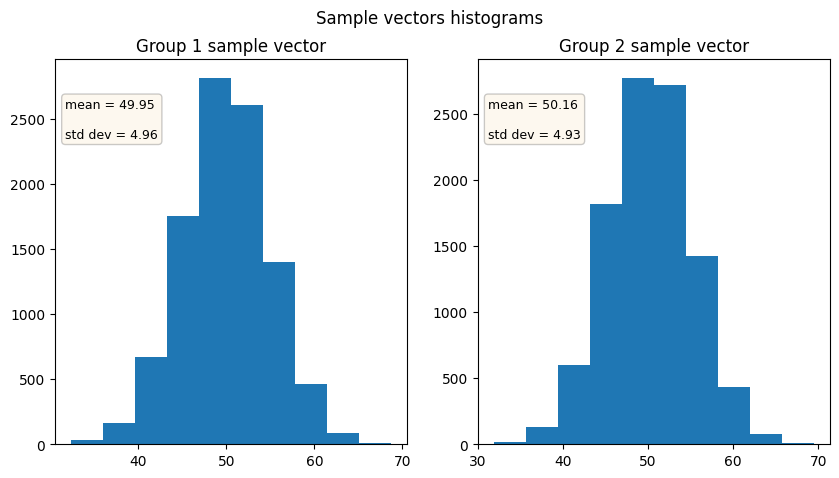

In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

# generate two samples for two groups with same std and different mean
np.random.seed(7)
sample_size = 10000
mean = 50
std = 5

# group 1: mean 50 and std 5
group1 = np.random.normal(loc=mean, scale=std, size=sample_size)

# group 2: mean 50.2 and std 5
group2 = np.random.normal(loc=mean + 0.2, scale=std, size=sample_size)

# plot the distributions
fig, axs = plt.subplots(1,2, figsize=(10,5))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.2)
x_props = 0.03
y_props = 0.9

axs[0].hist(group1)
axs[0].set_title('Group 1 sample vector')
axs[0].text(x_props, y_props, f'mean = {round(np.mean(group1),2)}\n\nstd dev = {round(np.std(group1),2)}', transform=axs[0].transAxes, fontsize=9,
        verticalalignment='top', bbox=props)

axs[1].hist(group2)
axs[1].set_title('Group 2 sample vector')
axs[1].text(x_props, y_props, f'mean = {round(np.mean(group2),2)}\n\nstd dev = {round(np.std(group2),2)}', transform=axs[1].transAxes, fontsize=9,
        verticalalignment='top', bbox=props)

fig.suptitle('Sample vectors histograms')


# Student t test
t_stat, p_value = stats.ttest_ind(group1, group2)

# Cohen d
mean_diff = np.mean(group1) - np.mean(group2)
pooled_std = np.sqrt((np.std(group1, ddof=1) ** 2 + np.std(group2, ddof=1) ** 2) / 2)
cohen_d = mean_diff / pooled_std

# results
print(f"t test p-value: {p_value:.2}")
print(f"Cohen d: {abs(cohen_d):.2}")
print()

# interpretation
if p_value < 0.05:
    print("There's a statistical difference between the two groups means.")
else:
    print("There isn't a statistical difference between the two groups means.")

if abs(cohen_d) < 0.2:
    print("The Cohen d is extremely small, it probably isn't relevant from a practical point of view.")
elif abs(cohen_d) < 0.5:
    print("The Cohen d is small.")
elif abs(cohen_d) < 0.8:
    print("The Cohen d is moderate.")
else:
    print("The Cohen d is large.")